In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import shutil
from math import *

def readSurfaceMeshes(PARENT_PATH,SNODES):
    
    surfaceMeshesFile=open(PARENT_PATH+SNODES)
    surfaceMeshes=[]
    line=surfaceMeshesFile.readline()
    assert(line=="Number of surfaces\n")
    line=surfaceMeshesFile.readline()
    numSurfaces=int(line.split()[0])
    line=surfaceMeshesFile.readline()
    numNodesPerMesh=int(line.split()[0])
    surfaceIndex=0
    while(surfaceIndex<numSurfaces):
        thisMesh=[]
        while(1):
            line=surfaceMeshesFile.readline()
            if(line=="\n"): break
            thisMesh.append(int(line.split()[0]))
        surfaceIndex+=1
        surfaceMeshes.append(thisMesh)
    return surfaceMeshes
# augSurfaceMeshes=readSurfaceMeshes(surfaceMeshesFileName="compressing/surfaceMeshes.txt")

def readPerNodesData(PARENT_PATH,step):
    nodeFile=open(PARENT_PATH+"/compressing/dataPerNode-"+str(step)+".txt")
    line=nodeFile.readline()
    assert(line.split()[0]== "numNodes")
    numNodes=int(line.split()[1])
    line=nodeFile.readline()
    assert(line.split()[0]== "kTOverOmega")
    kTOverOmega = int(line.split()[1]);
    line=nodeFile.readline()
    assert(line.split()[0]== "phi")
    strPhi = str(line.split()[1])
    line=nodeFile.readline()
    assert(line.split()[0]== "timeStep")
    timeStep = int(line.split()[1])
    line=nodeFile.readline()
    assert(line.split()[0]== "wallsLRBT")
    leftPos = float(line.split()[1])
    rightPos = float(line.split()[2])
    botPos = float(line.split()[3])
    topPos = float(line.split()[4])

    nodesX=np.zeros(numNodes)
    nodesY=np.zeros(numNodes)
    forceX=np.zeros(numNodes)
    forceY=np.zeros(numNodes)
    errForceX=np.zeros(numNodes)
    errForceY=np.zeros(numNodes)

    nodeFile.readline()
    nodeFile.readline()
    for i in range(numNodes):
        line=nodeFile.readline().split()
        nodesX[i]=float(line[1])
        nodesY[i]=float(line[2])
        forceX[i]=float(line[3])
        forceY[i]=float(line[4])
        errForceX[i]=float(line[5])
        errForceY[i]=float(line[6])

    nodeFile.close()
    return [step, numNodes,leftPos,rightPos, topPos, botPos, nodesX, nodesY, forceX, forceY, errForceX, errForceY, strPhi, kTOverOmega]

def readPeriodicPerNode(PARENT_PATH,step):

    augNodeFile=open(PARENT_PATH+"/compressing/dataPerNodePeriodicImages-"+str(step)+".txt")
    line=augNodeFile.readline()
    assert(line.split()[0]== "numNodes")
    augNumNodes=int(line.split()[1])
    line=augNodeFile.readline()
    assert(line.split()[0]== "kTOverOmega")
    kTOverOmega = int(line.split()[1]);
    line=augNodeFile.readline()
    assert(line.split()[0]== "phi")
    strPhi = str(line.split()[1])
    line=augNodeFile.readline()
    assert(line.split()[0]== "timeStep")
    timeStep = int(line.split()[1])
    line=augNodeFile.readline()
    assert(line.split()[0]== "wallsLRBT")
    leftPos = float(line.split()[1])
    rightPos = float(line.split()[2])
    botPos = float(line.split()[3])
    topPos = float(line.split()[4])

    line=augNodeFile.readline()
    assert(line.split()[0]== "cellSizeX")
    cellSizeX = float(line.split()[1])
    line=augNodeFile.readline()
    assert(line.split()[0]== "cellSizeY")
    cellSizeY = float(line.split()[1])
    line=augNodeFile.readline()
    assert(line.split()[0]== "effectiveLeftPos")
    effLeftPos = float(line.split()[1])
    line=augNodeFile.readline()
    assert(line.split()[0]== "effectiveBotPos")
    effBotPos = float(line.split()[1])
    line=augNodeFile.readline()
    assert(line.split()[0]== "numCellsX")
    numCellsX = int(line.split()[1])
    line=augNodeFile.readline()
    assert(line.split()[0]== "numCellsY")
    numCellsY = int(line.split()[1])

    augNodesX=np.zeros(augNumNodes)
    augNodesY=np.zeros(augNumNodes)


    augNodeFile.readline()
    augNodeFile.readline()
    for i in range(augNumNodes):
        line=augNodeFile.readline().split()
        augNodesX[i]=float(line[1])
        augNodesY[i]=float(line[2])
        

    augNodeFile.close()
    return [augNumNodes, timeStep, leftPos, rightPos, botPos, topPos, cellSizeX, cellSizeY, numCellsX, numCellsY, effBotPos, effLeftPos, augNodesX, augNodesY]


def readPerEleData(PARENT_PATH,step):
    triFile=open(PARENT_PATH+"/compressing/dataPerEle-"+str(step)+".txt")
    line=triFile.readline()
    assert(line.split()[0]== "numElements")
    numElements = int(line.split()[1])

    for i in range(9):
    	triFile.readline().split()

    refArea=np.zeros(numElements)
    areaRatio=np.zeros(numElements)
    PK1StressXX=np.zeros(numElements)
    PK1StressXY=np.zeros(numElements)
    PK1StressYX=np.zeros(numElements)
    PK1StressYY=np.zeros(numElements)
    CStressXX=np.zeros(numElements)
    CStressXY=np.zeros(numElements)
    CStressYX=np.zeros(numElements)
    CStressYY=np.zeros(numElements)
    FXX=np.zeros(numElements)
    FXY=np.zeros(numElements)
    FYX=np.zeros(numElements)
    FYY=np.zeros(numElements)


    for i in range(numElements):
        line = triFile.readline().split()
        refArea[i]=float(line[1])
        areaRatio[i]=float(line[2])
        PK1StressXX[i]=float(line[7])
        PK1StressXY[i]=float(line[8])
        PK1StressYX[i]=float(line[9])
        PK1StressYY[i]=float(line[10])
        CStressXX[i]=float(line[11])
        CStressXY[i]=float(line[12])
        CStressYX[i]=float(line[13])
        CStressYY[i]=float(line[14])
        FXX[i]=float(line[3])
        FXY[i]=float(line[4])
        FYX[i]=float(line[5])
        FYY[i]=float(line[6])

    triFile.close()

    elements=[]
    elementsFile=open(PARENT_PATH+"/compressing/elements.txt")

    for i in range(numElements):
        line=elementsFile.readline().split()
        elements.append([int(line[0]),int(line[1]),int(line[2])])
    elementsFile.close()
    return [numElements, refArea, areaRatio,PK1StressXX, PK1StressXY, PK1StressYX, PK1StressYY, CStressXX, CStressXY, CStressYX, CStressYY, elements,FXX,FYY]

In [41]:
def triCenters(perElement, perNode):
    nodesX=perNode[6]
    nodesY=perNode[7]
    elements=perElement[11]
    centers=[]
    for i in elements:
        x = (nodesX[i[0]]+nodesX[i[1]]+nodesX[i[2]])/3
        y = (nodesY[i[0]]+nodesY[i[1]]+nodesY[i[2]])/3
        centers.append([x,y])
    return centers

def neighbourhood(xmin,xmax,ymin,ymax,centers, perElement, perNode):
    elements=perElement[11]
    nodesX=perNode[6]
    nodesY=perNode[7]
    nNodesX=[]
    nNodesY=[]
    nElements=[]
    nElemtnsIDs=[]
    nFxx=[]
    nFyy=[]
    nSxx=[]
    nSyy=[]
    nForceX=[]
    nForceY=[]
    for i in range(len(centers)):
        xy=centers[i]
        if xy[0]>xmin and xy[0]<xmax and xy[1]>ymin and xy[1]<ymax:
            nNodesX.append(nodesX[elements[i][0]])
            nNodesX.append(nodesX[elements[i][1]])
            nNodesX.append(nodesX[elements[i][2]])
            nNodesY.append(nodesY[elements[i][0]])
            nNodesY.append(nodesY[elements[i][1]])
            nNodesY.append(nodesY[elements[i][2]])
            nElements.append(elements[i])
            nFxx.append(FXX[i])
            nFyy.append(FYY[i])
            nSxx.append(CStressXX[i])
            nSyy.append(CStressYY[i])
            nElemtnsIDs.append(i)
  
    return [nNodesX, nNodesY, nElements,nElemtnsIDs, nFxx, nFyy, nSxx, nSyy, nForceX, nForceY]

def plot_shear_strain(perNode,centers,neighbourHood,xmin,xmax,ymin,ymax, nodeID=False, triID=False):
    nodesX=perNode[6]
    nodesY=perNode[7]
    elementsIDs=neighbourHood[3]
    elements=neighbourHood[2]
    FXX=neighbourHood[4]
    FYY=neighbourHood[5]
    plt.figure(figsize=(20,20))
    plt.tripcolor(nodesX, nodesY,elements,facecolors=(np.array(FXX)-np.array(FYY)),edgecolors='none',cmap='jet')
    plt.colorbar()
    plt.axis([xmin,xmax,ymin,ymax]) 
    
    if nodeID:
        for i in range(len(elements)):
            x1 = nodesX[elements[i][0]]
            y1 = nodesY[elements[i][0]]
            x2 = nodesX[elements[i][1]]
            y2 = nodesY[elements[i][1]]
            x3 = nodesX[elements[i][2]]
            y3 = nodesY[elements[i][2]]
            plt.text(nodesX[elements[i][0]],nodesY[elements[i][0]],elements[i][0])
            plt.text(nodesX[elements[i][1]],nodesY[elements[i][1]],elements[i][1])
            plt.text(nodesX[elements[i][2]],nodesY[elements[i][2]],elements[i][2])
    if triID:
        for i in range(len(elementsIDs)):
            ID=elementsIDs[i]
            plt.text(centers[ID][0],centers[ID][1],ID)

def sortInBins(perNode,perElement,centers,binSize):
    nodesX=perNode[6]
    nodesY=perNode[7]
    elements=perElement[11]
    xmin=min(np.array(nodesX))
    xmax=max(np.array(nodesX))
    ymin=min(np.array(nodesY))
    ymax=max(np.array(nodesY))
    LX=xmax-xmin
    LY=ymax-ymin
    numXbins=int(LX/binSize)
    numYbins=int(LY/binSize)
    xbinSize=LX/numXbins
    ybinSize=LY/numYbins
    cellList=np.empty(len(elements)+numXbins*numYbins,dtype = int)
    cellList.fill(-1)
    for i in range(len(centers)):
        x=centers[i][0]
        y=centers[i][1]
        xBin=int(floor((x-xmin)/xbinSize))
        yBin=int(floor((y-ymin)/ybinSize))
        cellList[i]=cellList[len(elements)+xBin+yBin*numXbins]
        cellList[len(elements)+xBin+yBin*numXbins]=i
    return [cellList,xmin,xmax,ymin,ymax,LX,LY,numXbins,numYbins,xbinSize,ybinSize]

def whichTri(x,y,perNode,perElement,binSize,centers):
    nodesX=perNode[6]
    nodesY=perNode[7]
    elements=perElement[11]
    cellList,xmin,xmax,ymin,ymax,LX,LY,numXbins,numYbins,xbinSize,ybinSize=sortInBins(perNode,perElement,centers,binSize)
    xBin=int(floor((x-xmin)/xbinSize))
    yBin=int(floor((y-ymin)/ybinSize))
    cBin=xBin+yBin*numXbins
    for index in [[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]]:
        nXbin= xBin+index[0]
        nYbin= yBin+index[1]
        nBin=nXbin+nYbin*numXbins
        
        tri=cellList[len(elements)+nBin]
        
        while(tri!=-1):
            x0=nodesX[elements[tri][0]]
            y0=nodesY[elements[tri][0]]
            x1=nodesX[elements[tri][1]]
            y1=nodesY[elements[tri][1]]
            x2=nodesX[elements[tri][2]]
            y2=nodesY[elements[tri][2]]
            
            if isInsideTri(x,y,x0,y0,x1,y1,x2,y2):
                return tri
                break
            else:
                tri=cellList[tri]
                
            
def isInsideTri(x,y,x0,y0,x1,y1,x2,y2):   
    dx0 = x1-x0
    dy0 = y1-y0
    L0 = sqrt(dx0**2+dy0**2)
    nx0 = dy0/L0
    ny0 = - dx0/L0
    sign0 = np.sign((x-x0)*nx0+(y-y0)*ny0)
    
    dx1 = x2-x1
    dy1 = y2-y1
    L1 = sqrt(dx1**2+dy1**2)
    nx1 = dy1/L1
    ny1 = - dx1/L1
    sign1 = np.sign((x-x1)*nx1+(y-y1)*ny1)
    
    dx2 = x0-x2
    dy2 = y0-y2
    L2 = sqrt(dx2**2+dy2**2)
    nx2 = dy2/L2
    ny2 = - dx2/L2
    sign2 = np.sign((x-x2)*nx2+(y-y2)*ny2)
    
    if (sign0<=0) and (sign1<=0) and (sign2<=0):
        return True
    else:
        return False
    
def pointsLongLine(angle,xc,yc,radius,step):
    Xs=[]
    Ys=[]
    R=np.arange(1E-6,radius,step)
    for r in R:
        x=xc+r*cos(angle)
        y=yc+r*sin(angle)
        Xs.append(x)
        Ys.append(y)
    return [Xs,Ys,R]

def FieldValuesAlongALine(field,perNode,perElement,centers,angle,xc,yc,radius,step,binSize):
    Xs,Ys,R= pointsLongLine(angle,xc,yc,radius,step)
    solution=[]
    for i in range(len(Xs)):
        x=Xs[i]
        y=Ys[i]
        tri=whichTri(x,y,perNode,perElement,binSize,centers)
        solution.append(field[tri])
    return [solution,Xs,Ys,R]

def analyticalShearStrain(angle,gamma,R):
    Strain_th=[]
    for r in R:
        Strain_th.append(gamma*(1/r**2*20)*sin(angel/4))
    return Strain_th
                      
                                        

In [7]:
PARENT_PATH1="../point_force_1E1"
SNODES1="/square1000by1000.snode"
step1=229000
surfaceMeshes1=readSurfaceMeshes(PARENT_PATH1, SNODES1)
perNode1=readPerNodesData(PARENT_PATH1,step1)
perElement1=readPerEleData(PARENT_PATH1,step1)


In [4]:
PARENT_PATH2="../point_force/"
SNODES2="/square1000by1000.snode"
step2=228000
surfaceMeshes2=readSurfaceMeshes(PARENT_PATH2, SNODES2)
perNode2=readPerNodesData(PARENT_PATH2,step2)
perElement2=readPerEleData(PARENT_PATH2,step2)

In [5]:
PARENT_PATH3="../point_force_1E3/"
SNODES3="/square1000by1000.snode"
step3=228000
surfaceMeshes3=readSurfaceMeshes(PARENT_PATH3, SNODES3)
perNode3=readPerNodesData(PARENT_PATH3,step3)
perElement3=readPerEleData(PARENT_PATH3,step3)

In [9]:
centers1=triCenters(perElement1, perNode1)
centers2=triCenters(perElement2, perNode2)
centers3=triCenters(perElement3, perNode3)
    

In [40]:
np.sign(-9)

-1

In [31]:
radius=200
angle=pi/4
step=1
xc=0.0
yc=0.0
binSize=5


In [42]:
gamma1=1E-1
shear1=list(perElement1[12]/3-perElement1[13]/3)
sol_1=FieldValuesAlongALine(shear1,perNode1,perElement1,centers1,angle,xc,yc,radius,step, binSize)
R1=sol_1[3]
S_th1 = analyticalShearStrain(angle,gamma1,R1)
    

In [43]:
gamma2=1E-2
shear2=list(perElement2[12]/3-perElement2[13]/3)
sol_2=FieldValuesAlongALine(shear2,perNode2,perElement2,centers2,angle,xc,yc,radius,step, binSize)
R2=sol_2[3]
S_th2 = analyticalShearStrain(angle,gamma2,R2)

In [44]:
gamma3=1E-3
shear3=list(perElement3[12]/3-perElement3[13]/3)
sol_3=FieldValuesAlongALine(shear3,perNode3,perElement3,centers3,angle,xc,yc,radius,step, binSize)
R3=sol_3[3]
S_th3 = analyticalShearStrain(angle,gamma3,R3)

Text(0.5,0,'$r$')

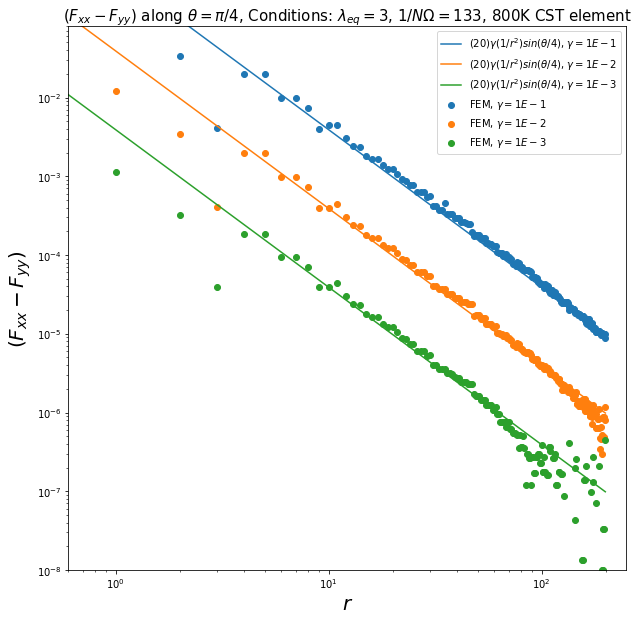

In [57]:
plt.figure(figsize=(10,10))

# plt.plot(R,S_th1)
plt.plot(R1,S_th1, label= r'$(20)\gamma(1/r^2)sin(\theta/4)$, $\gamma=1E-1$')
plt.plot(R2,S_th2, label= r'$(20)\gamma(1/r^2)sin(\theta/4)$, $\gamma=1E-2$')
plt.plot(R3,S_th3, label= r'$(20)\gamma(1/r^2)sin(\theta/4)$, $\gamma=1E-3$')
plt.scatter(R1,sol_1[0], label= r'FEM, $\gamma=1E-1$')
plt.scatter(R2,sol_2[0], label= r'FEM, $\gamma=1E-2$')
plt.scatter(R3,sol_3[0], label= r'FEM, $\gamma=1E-3$')

plt.yscale('log')
plt.xscale('log')
plt.ylim([1E-8, 0.08])
plt.xlim([6E-1,250])
plt.legend()
plt.title(r'$(F_{xx}-F_{yy})$ along $\theta=\pi/4$, Conditions: $\lambda_{eq}= 3$, $1/N\Omega=133$, 800K CST element ',size=15)
plt.ylabel(r'$(F_{xx}-F_{yy})$',size=20)
plt.xlabel(r'$r$',size=20)

In [153]:
b=50
nNodesX, nNodesY, nElements,nElementsIDs, nFxx, nFyy, nSxx, nSyy, nForceX, nForceY=neighbourhood(-b,b,-b,b, centers)

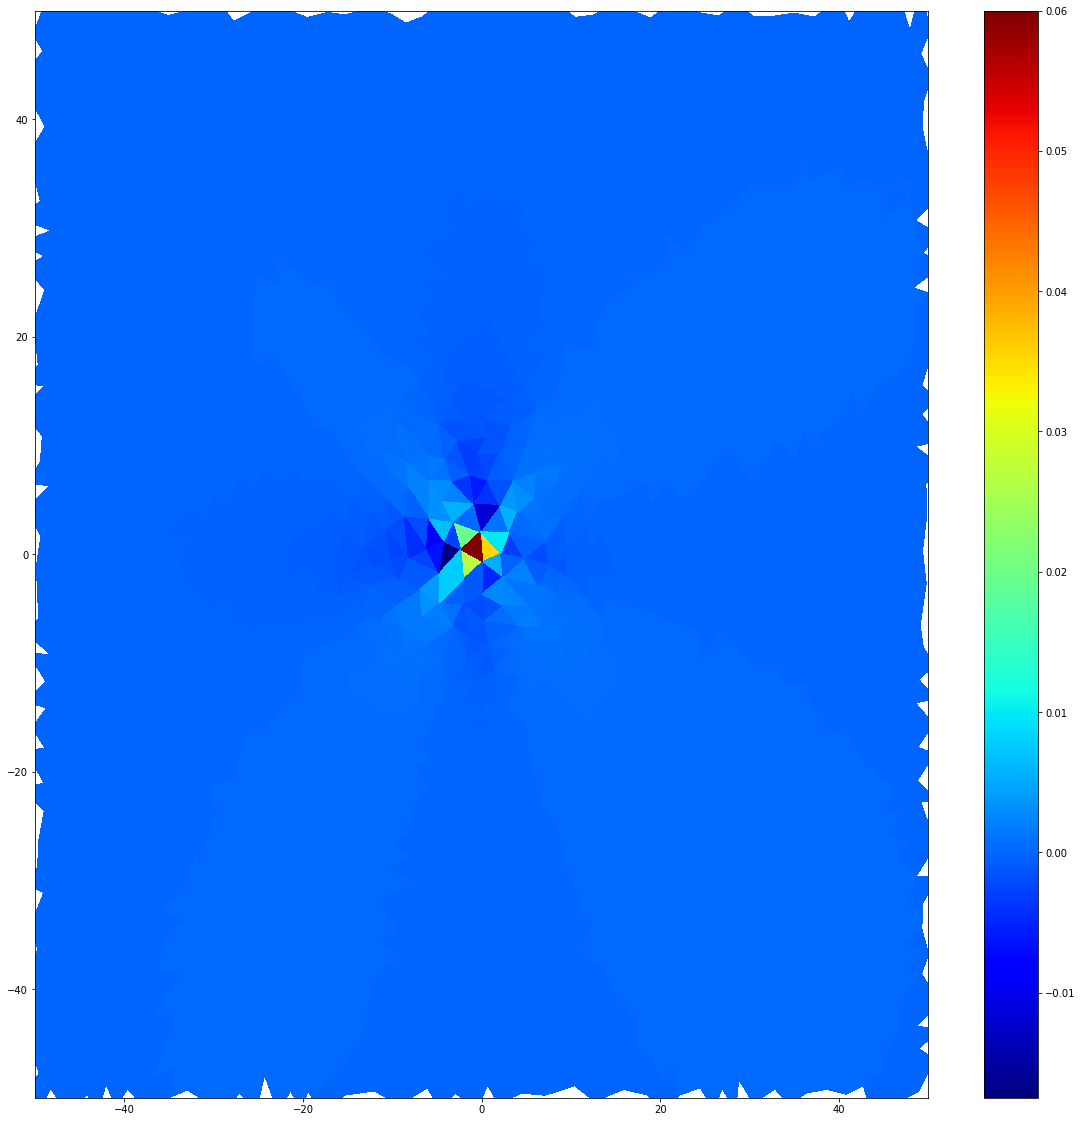

In [154]:
plot_shear_strain(nodesX,nodesY,nElements,nElementsIDs,centers,nFxx,nFyy,-b,b,-b,b)

In [55]:
floor(9/10)

0.0

In [68]:
cellList

array([   -1,    -1,     1, ..., 25178,  9289,  8469])

In [70]:
sign(-1)

-1